In [4]:
res = 'suction-based-grasping/convnet/demo/test-results.h5'

In [5]:
import h5py
f = h5py.File(res, 'r')

# List all groups
print("Keys: %s" % f.keys())
a_group_key = list(f.keys())[0]

# Get the data
data = list(f[a_group_key])

Keys: [u'results']


In [6]:
import numpy as np
a = np.array(f['results'])

In [7]:
import matplotlib.pyplot as plt
img = a[0]

In [8]:
img = np.transpose(img, [1,2,0])

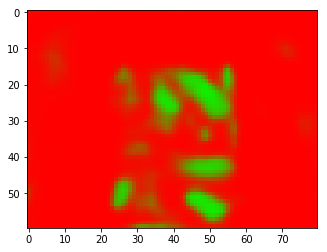

In [9]:
plt.imshow(img)
plt.show()

In [10]:
img.shape

(60, 80, 3)

In [11]:
import cv2

In [12]:
%matplotlib inline

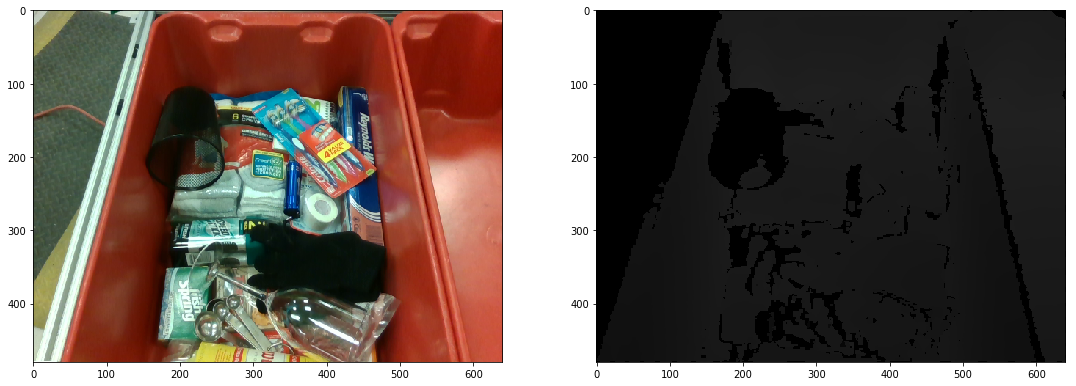

In [25]:
f, ax = plt.subplots(1,2)
im_col = cv2.imread('suction-based-grasping/convnet/demo/test-image.color.png')
im_dep = cv2.imread('suction-based-grasping/convnet/demo/test-image.depth.png')
ax[0].imshow(im_col[...,::-1])
ax[1].imshow(im_dep[...,::-1])
f.set_size_inches(18.5, 10.5)

In [75]:
def prob2heatmap(prob):
    print prob.shape
    cmap = plt.get_cmap('RdYlGn')
    m = np.max(prob).astype(float) 
    print m
    prob_sc = prob/m
    print prob_sc
    rgba_img = cmap(prob_sc)
    
    print rgba_img.shape
    return np.uint8((np.delete(rgba_img, 3, 2) * 255))

In [76]:
d_r = im_dep[...,::-1]

In [77]:
hm = prob2heatmap(d_r[:,:,0])

(480, 640)
33.0
[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.48484848  0.48484848 ...,  0.6969697   0.6969697
   0.6969697 ]
 [ 0.          0.          0.48484848 ...,  0.6969697   0.6969697
   0.6969697 ]
 [ 0.          0.          0.         ...,  0.6969697   0.6969697
   0.6969697 ]]
(480, 640, 4)


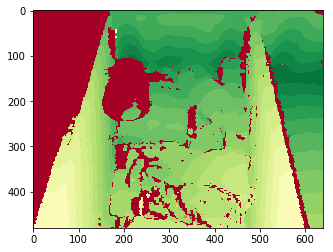

In [78]:
plt.imshow(hm)
plt.show()

In [87]:
bled_col_dep = cv2.addWeighted(im_col, 0.7, hm, 0.3, 0)

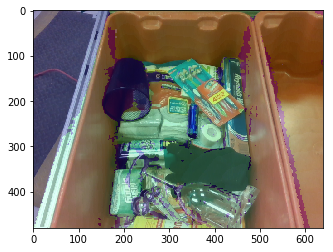

In [88]:
plt.imshow(bled_col_dep[...,::-1])

In [14]:
col = cv2.resize(im_col, (80, 60))
img_255 = (img * 255).astype(np.uint8)
bled_label_img = cv2.addWeighted(col, 0.7, img_255, 0.3, 0)

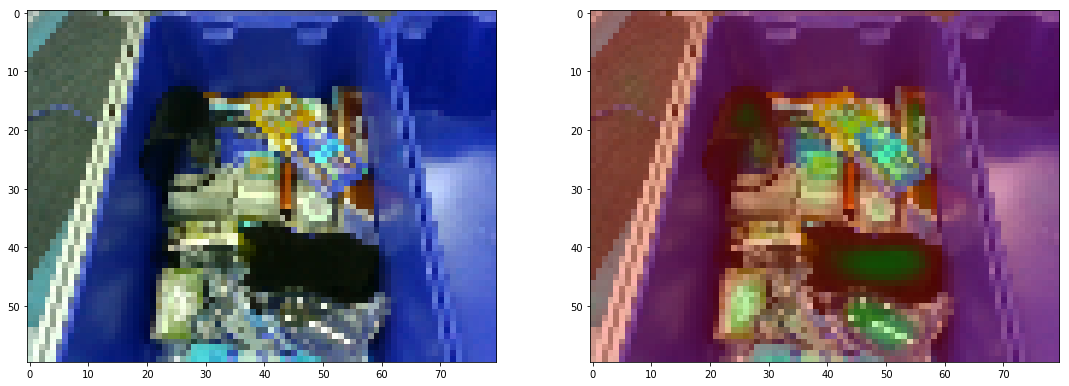

In [15]:
f, ax = plt.subplots(1,2)
ax[0].imshow(col)
ax[1].imshow(bled_label_img)
f.set_size_inches(18.5, 10.5)

In [16]:
img_re = cv2.resize(img, (640, 480))
img_re_255 = (img_re * 255).astype(np.uint8)
bled_label_img = cv2.addWeighted(im_col, 0.5, img_re_255, 0.5, 0)

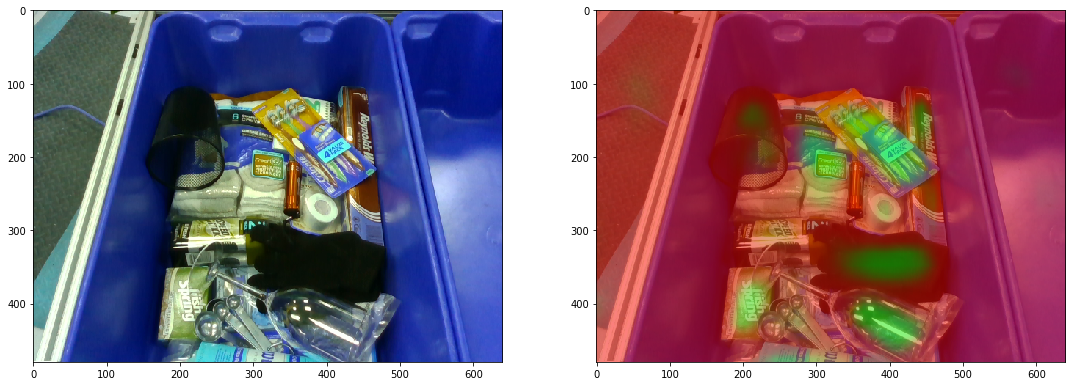

In [17]:
f, ax = plt.subplots(1,2)
ax[0].imshow(im_col)
ax[1].imshow(bled_label_img)
f.set_size_inches(18.5, 10.5)

In [18]:
! which jupyter

/home/jakub/.virtualenvs/arcmit/bin/jupyter


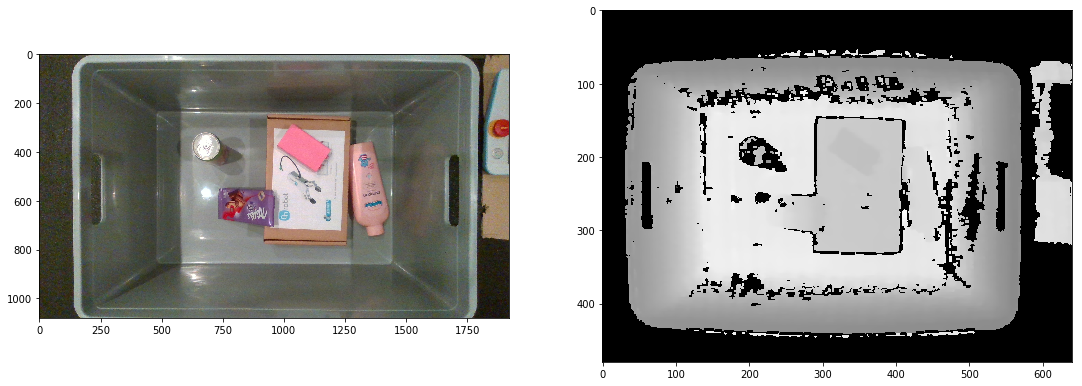

In [19]:
f, ax = plt.subplots(1,2)
im_col = cv2.imread('ourdata/color_0.png')
im_dep = cv2.imread('ourdata/depth_0.png')
ax[0].imshow(im_col[...,::-1])
ax[1].imshow(im_dep[...,::-1])
f.set_size_inches(18.5, 10.5)

In [20]:
im_col.shape

(1080, 1920, 3)

In [23]:
im_dep.shape

(480, 640, 3)

In [1]:
res = 'suction-based-grasping/convnet/demo/results-ourdata.h5'

In [2]:
import h5py
f = h5py.File(res, 'r')

# List all groups
print("Keys: %s" % f.keys())
a_group_key = list(f.keys())[0]

# Get the data
data = list(f[a_group_key])

Keys: [u'results']


In [3]:
import numpy as np
a = np.array(f['results'])

In [4]:
import matplotlib.pyplot as plt
img = a[0]

In [5]:
img = np.transpose(img, [1,2,0])

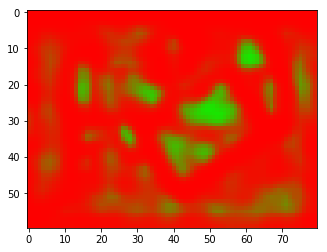

In [6]:
plt.imshow(img)
plt.show()

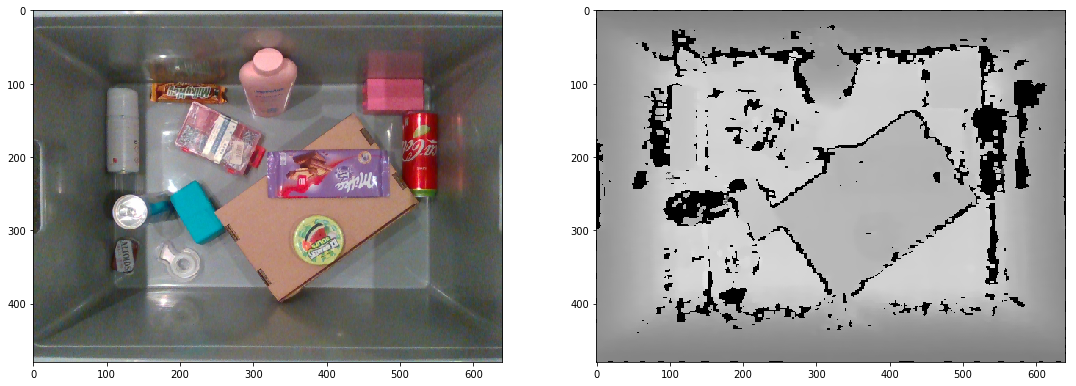

In [12]:
%matplotlib inline
import cv2
f, ax = plt.subplots(1,2)
im_col = cv2.imread('suction-based-grasping/convnet/demo/test-image.color.ourdata.png')
im_dep = cv2.imread('suction-based-grasping/convnet/demo/test-image.depth.ourdata.png')
ax[0].imshow(im_col[...,::-1])
ax[1].imshow(im_dep[...,::-1])
f.set_size_inches(18.5, 10.5)

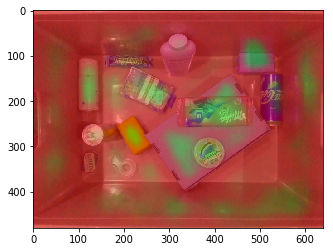

In [15]:
img_re = cv2.resize(img, (640, 480))
img_re_255 = (img_re * 255).astype(np.uint8)
bled_img = cv2.addWeighted(im_col, 0.5, img_re_255, 0.5, 0)
plt.imshow(bled_img)

In [21]:
def _get_coords(idx):
    # Add the top-1 mark to the image. Covert flattened (60, 80) to (480, 640)
    row = idx / 80
    col = idx - row * 80 - 1

    row = row * 8  # scaling
    col = col * 8
    return row, col

In [31]:
80*60

4800

In [32]:
img.shape

(60, 80, 3)

In [33]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [34]:
gray_image.shape

(60, 80)

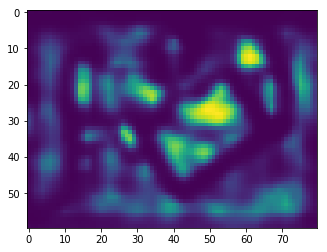

In [35]:
plt.imshow(gray_image)

In [36]:
np.argmax(gray_image)

2210

In [39]:
row, col = _get_coords(np.argmax(gray_image))

In [40]:
row, col

(216, 392)

In [45]:
top1 = cv2.circle(bled_img, (col, row), radius=10, color=(0, 0, 255), thickness=3, lineType=8, shift=0)


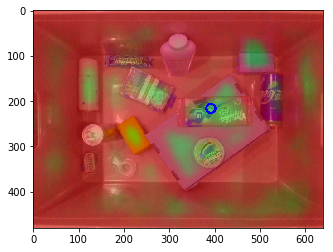

In [50]:
plt.imshow(top1)
plt.savefig('suction_prediction.png', dpi=300)